In [1]:
import pandas as pd
import bnlearn as bn
import networkx as nx
from matplotlib import pyplot as plt
import matplotlib.lines as mlines
import numpy as np
from causalnex.structure.notears import from_pandas
from pgmpy.estimators import PC

%matplotlib inline

In [2]:
cohort_file = '/home/gaurang/glycemic_control/data/glycaemia_project_csvs/data_v2/v2_gsdip.csv'

In [3]:
cohort_df = pd.read_csv(cohort_file)
cohort_df

,stay_id,glucose,hr,respiration_24hours,coagulation_24hours,liver_24hours,cardiovascular_24hours,cns_24hours,renal_24hours,sofa_24hours,...,severe_liver_disease,metastatic_solid_tumor,aids,charlson_comorbidity_index,diabetes,diabetes_type,septic,weight_kg,height_cm,bmi
0,30000213,125.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,9,1,2,0,84.7,160.02,33.1
1,30000213,108.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,9,1,2,0,84.7,160.02,33.1
2,30000213,156.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0,0,0,9,1,2,0,84.7,160.02,33.1
3,30000213,171.0,8.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,...,0,0,0,9,1,2,0,84.7,160.02,33.1
4,30000213,164.0,12.0,0.0,0.0,0.0,1.0,1.0,3.0,5.0,...,0,0,0,9,1,2,0,84.7,160.02,33.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899732,39999552,86.0,13.0,3.0,0.0,0.0,1.0,4.0,0.0,8.0,...,0,0,0,4,0,0,0,64.5,172.72,21.6
899733,39999552,91.0,14.0,3.0,0.0,0.0,1.0,4.0,0.0,8.0,...,0,0,0,4,0,0,0,64.5,172.72,21.6
899734,39999552,134.0,16.0,3.0,0.0,0.0,1.0,4.0,0.0,8.0,...,0,0,0,4,0,0,0,64.5,172.72,21.6
899735,39999552,92.0,17.0,3.0,0.0,0.0,1.0,4.0,0.0,8.0,...,0,0,0,4,0,0,0,64.5,172.72,21.6


In [4]:
len(cohort_df)

899737

In [5]:
cohort_df.columns

Index(['stay_id', 'glucose', 'hr', 'respiration_24hours',
       'coagulation_24hours', 'liver_24hours', 'cardiovascular_24hours',
       'cns_24hours', 'renal_24hours', 'sofa_24hours', 'dex5', 'dex>5',
       'dexPN', 'pre_dex5', 'pre_dex>5', 'pre_dexPN', 'pos_dex5', 'pos_dex>5',
       'pos_dexPN', 'SC_sa_insulin', 'SC_ma_insulin', 'SC_la_insulin',
       'PN_sa_insulin', 'IV_sa_insulin', 'pre_SC_sa_insulin',
       'pre_SC_ma_insulin', 'pre_SC_la_insulin', 'pre_PN_sa_insulin',
       'pre_IV_sa_insulin', 'pos_SC_sa_insulin', 'pos_SC_ma_insulin',
       'pos_SC_la_insulin', 'pos_PN_sa_insulin', 'pos_IV_sa_insulin',
       'subject_id', 'hadm_id', 'gender', 'dod', 'admittime', 'dischtime',
       'los_hospital', 'admission_age', 'ethnicity', 'hospital_expire_flag',
       'hospstay_seq', 'first_hosp_stay', 'icu_intime', 'icu_outtime',
       'los_icu', 'icustay_seq', 'first_icu_stay', 'age_score',
       'myocardial_infarct', 'congestive_heart_failure',
       'peripheral_vascular_dis

In [6]:
metadata_cols = ['stay_id', 'gender', 'admission_age', 'ethnicity', 'diabetes']
metadata_df = cohort_df[metadata_cols]
print(len(metadata_df))
metadata_df.drop_duplicates(subset=['stay_id'], inplace=True)
print(len(metadata_df))

899737
35007


In [7]:
stay_counts_df = cohort_df.groupby(['stay_id'])['stay_id'].count()
stay_counts_df

stay_id
30000213    11
30000484     3
30000646     7
30001148    11
30002415    18
            ..
39999172     6
39999230    19
39999286     4
39999301     6
39999552    15
Name: stay_id, Length: 35007, dtype: int64

In [8]:
metadata_df['stay_counts'] = stay_counts_df.values

In [9]:
metadata_df[metadata_df['stay_counts'] > 50]

,stay_id,gender,admission_age,ethnicity,diabetes,stay_counts
246,30006983,M,77,ASIAN,0,190
473,30007565,M,84,UNKNOWN,1,176
673,30008148,M,60,WHITE,1,65
803,30009339,M,64,WHITE,0,226
1029,30009505,M,75,WHITE,0,75
...,...,...,...,...,...,...
898947,39986775,F,65,WHITE,0,65
899090,39990093,M,54,WHITE,0,83
899390,39995735,M,62,WHITE,0,57
899447,39996073,F,66,HISPANIC/LATINO,0,65


In [10]:
meta_diabetic_df = metadata_df[metadata_df['diabetes'] == 1]
meta_nonDiabetic_df = metadata_df[metadata_df['diabetes'] == 0]

meta_child_df = metadata_df[metadata_df['admission_age'] < 20]
meta_youth_df = metadata_df[(20<=metadata_df['admission_age']) & (metadata_df['admission_age'] < 40)]
meta_middleAged_df = metadata_df[(40<=metadata_df['admission_age']) & (metadata_df['admission_age'] < 60)]
meta_old_df = metadata_df[metadata_df['admission_age'] >= 60]

meta_old_diabetic_df = meta_old_df[meta_old_df['diabetes'] == 1]
meta_old_nonDiabetic_df = meta_old_df[meta_old_df['diabetes'] == 0]

meta_youth_diabetic_df = meta_youth_df[meta_youth_df['diabetes'] == 1]
meta_youth_nonDiabetic_df = meta_youth_df[meta_youth_df['diabetes'] == 0]

In [11]:
diabetic_df = cohort_df[cohort_df['diabetes'] == 1]
nonDiabetic_df = cohort_df[cohort_df['diabetes'] == 0]

child_df = cohort_df[cohort_df['admission_age'] < 20]
youth_df = cohort_df[(20<=cohort_df['admission_age']) & (cohort_df['admission_age'] < 40)]
middleAged_df = cohort_df[(40<=cohort_df['admission_age']) & (cohort_df['admission_age'] < 60)]
old_df = cohort_df[cohort_df['admission_age'] >= 60]

old_diabetic_df = old_df[old_df['diabetes'] == 1]
old_nonDiabetic_df = old_df[old_df['diabetes'] == 0]

youth_diabetic_df = youth_df[youth_df['diabetes'] == 1]
youth_nonDiabetic_df = youth_df[youth_df['diabetes'] == 0]

### Hidden code

In [168]:
#getting per patient time series

group_len = 20
stay_groups = diabetic_df.groupby(by='stay_id')
for group in stay_groups:
    if len(group[1]) >= group_len:
        group_len = len(group[1])
        selected_group = group

iid_sampled_df = selected_group[1]
iid_sampled_df

In [7]:
iid_df.columns

Index(['stay_id', 'hr', 'glucose', 'last_glucose_value', 'last_glucose_time',
       'gender', 'dod', 'los_hospital', 'admission_age', 'ethnicity',
       'hospital_expire_flag', 'icu_intime', 'los_icu', 'myocardial_infarct',
       'congestive_heart_failure', 'peripheral_vascular_disease',
       'cerebrovascular_disease', 'dementia', 'chronic_pulmonary_disease',
       'rheumatic_disease', 'peptic_ulcer_disease', 'mild_liver_disease',
       'diabetes_without_cc', 'diabetes_with_cc', 'paraplegia',
       'renal_disease', 'malignant_cancer', 'severe_liver_disease',
       'metastatic_solid_tumor', 'aids', 'charlson_comorbidity_index',
       'diabetes', 'diabetes_type', 'weight_kg', 'height_cm', 'bmi', 'septic',
       'short_term_hr_amount', 'mid_term_hr_amount', 'long_term_hr_amount',
       'last_short_term_amount', 'last_short_term_time',
       'short_term_amount_previous_hr', 'last_mid_term_amount',
       'last_mid_term_time', 'mid_term_amount_previous_hr',
       'last_long_te

In [9]:
#one hot encoding gender
one_hot = bn.bnlearn.df2onehot(iid_df[['gender']])
iid_df.drop(labels=['gender'], axis=1, inplace=True)
df = pd.concat([iid_df.reset_index(), one_hot[0]], axis=1)

In [10]:
#structure learning by bnlearn
c = PC(df)
model = c.estimate_skeleton(verbose=True)
print(model.edges())
DAG = bn.structure_learning.fit(df)

In [42]:
covariate_list = ['glucose', 'short_term_hr_amount', 'mid_term_hr_amount',
       'long_term_hr_amount', 'last_short_term_amount',
       'short_term_amount_previous_hr', 'last_mid_term_amount',
       'mid_term_amount_previous_hr', 'last_long_term_amount',
       'long_term_amount_previous_hr', 'dextrose_g_hr', 'last_dextrose_amount', 'temperature', 'respiration_24hours', 'coagulation_24hours', 'liver_24hours',
       'cardiovascular_24hours', 'cns_24hours', 'renal_24hours',
       'sofa_24hours', 'admission_age', 'bmi']


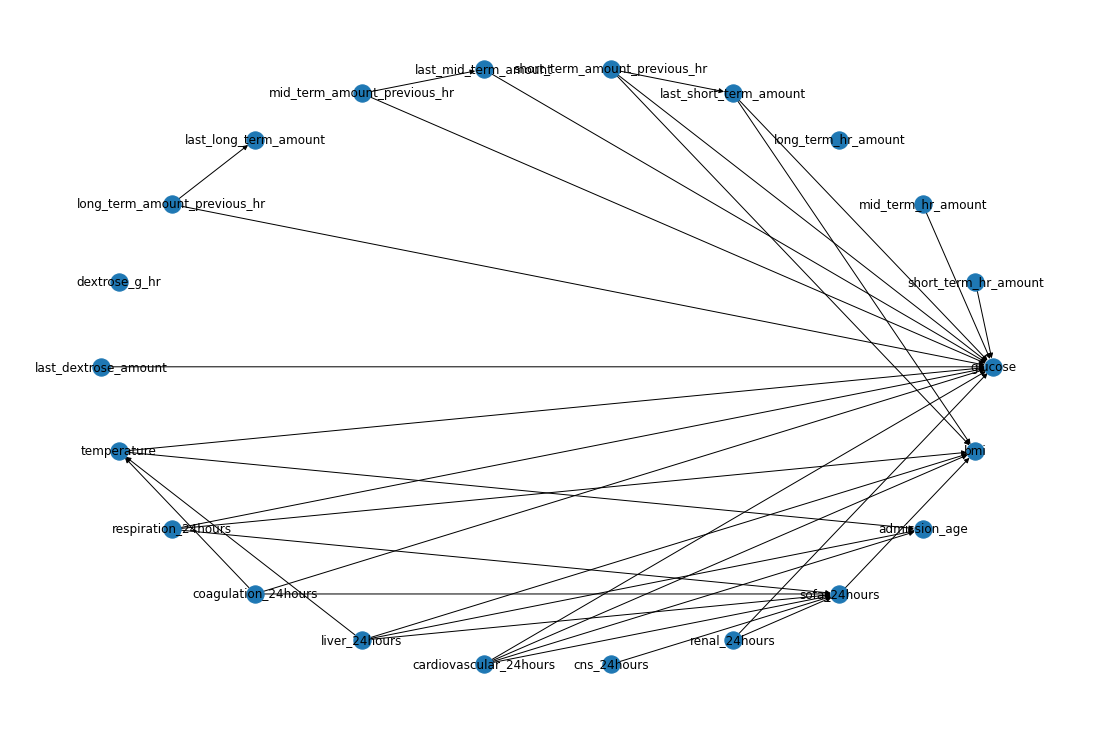

In [14]:
a.remove_edges_below_threshold(0.8)
plt.figure(figsize=(15,10))
nx.draw_circular(a)
nx.draw_networkx_labels(a, pos=nx.circular_layout(a))
plt.show()

### DAGS

In [54]:
covariate_list = ['glucose', 'short_term_hr_amount', 'mid_term_hr_amount',
       'long_term_hr_amount', 'last_short_term_amount',
       'short_term_amount_previous_hr', 'last_mid_term_amount',
       'mid_term_amount_previous_hr', 'last_long_term_amount',
       'long_term_amount_previous_hr', 'dextrose_g_hr', 'last_dextrose_amount',
       'sofa_24hours', 'admission_age', 'bmi']

In [73]:
meta_youth_df[meta_youth_df['stay_counts'] > 130]

,stay_id,gender,admission_age,ethnicity,diabetes,stay_counts
82708,31544131,F,22,OTHER,1,138
131179,32440061,F,39,BLACK/AFRICAN AMERICAN,1,131
140741,32620232,M,33,UNKNOWN,0,141
257497,34783884,F,39,WHITE,1,132
334567,36277397,M,38,ASIAN,1,131
432184,38073141,M,33,OTHER,0,147


In [74]:
a = diabetic_df[diabetic_df['stay_id'] == 31544131]   #Other F 22 yrs - diab
b = diabetic_df[diabetic_df['stay_id'] == 31491370]         #white M 61 yrs - diab

In [75]:
a = from_pandas(a[covariate_list].dropna().sample(min(10000, len(a))))
b = from_pandas(b[covariate_list].dropna().sample(min(10000, len(b))))
a.remove_edges_below_threshold(0.8)
b.remove_edges_below_threshold(0.8)

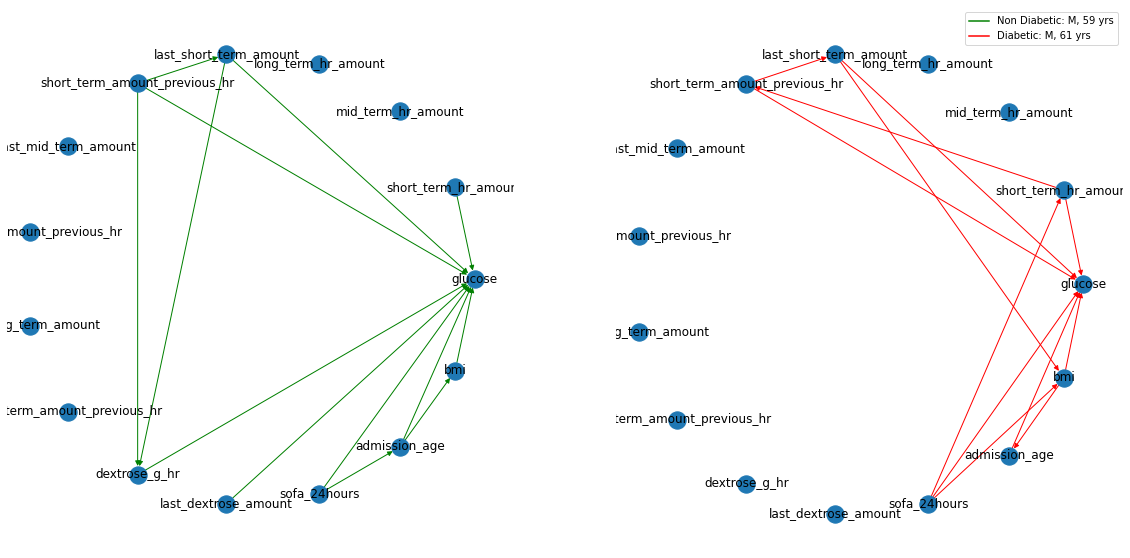

In [76]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
nx.draw_circular(a, edge_color='green')
nx.draw_networkx_labels(a, pos=nx.circular_layout(a))
plt.subplot(1,2,2)
nx.draw_circular(b, edge_color='red')
nx.draw_networkx_labels(b, pos=nx.circular_layout(b))
green_line = mlines.Line2D([], [], color='green', markersize=2, label='Non Diabetic: M, 59 yrs')
red_line = mlines.Line2D([], [], color='red', markersize=2, label='Diabetic: M, 61 yrs')
plt.legend(handles=[green_line, red_line])
plt.show()

In [77]:
edges_a = set(a.edges)
edges_b = set(b.edges)
common_edges = edges_a.intersection(edges_b)
edges_a_only = edges_a.difference(edges_b)
edges_b_only = edges_b.difference(edges_a)

super_graph = nx.compose(a, b)
edge_colors = []
for e in super_graph.edges:
    if e in common_edges:
        edge_colors.append('gray')
    elif e in edges_a_only:
        edge_colors.append('green')
    elif e in edges_b_only:
        edge_colors.append('red')

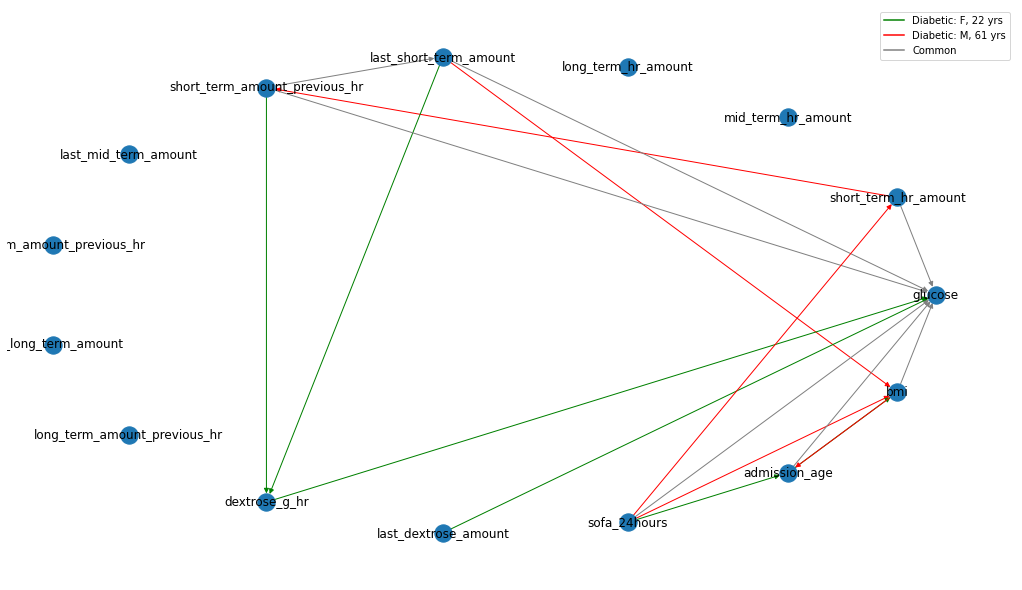

In [78]:
plt.figure(figsize=(14,8))
nx.draw_circular(super_graph, edge_color=edge_colors)
nx.draw_networkx_labels(super_graph, pos=nx.circular_layout(super_graph))
green_line = mlines.Line2D([], [], color='green', markersize=2, label='Diabetic: F, 22 yrs')
red_line = mlines.Line2D([], [], color='red', markersize=2, label='Diabetic: M, 61 yrs')
gray_line = mlines.Line2D([], [], color='gray', markersize=2, label='Common')
plt.legend(handles=[green_line, red_line, gray_line])
plt.show()